# 02 — Model Training and Evaluation

> **Objective:** Develop a reproducible machine learning pipeline to train, evaluate, and save a baseline **Linear Regression** model for house price prediction.

### Steps covered:
1. Define the input features and target variable  
2. Split the dataset into training and testing subsets  
3. Build a preprocessing pipeline for numeric and categorical features  
4. Train a Linear Regression model  
5. Evaluate performance using RMSE and R² metrics  
6. Visualize actual vs. predicted values  

---
### 🧰 Imports - Machine Learning Tools
This section loads the core libraries required for model training and evaluation:

- **pandas**, **NumPy** — standard libraries for data manipulation and numerical operations.  
- **train_test_split** (`sklearn.model_selection`) — divides the dataset into training and testing subsets.  
- **ColumnTransformer** (`sklearn.compose`) and **OneHotEncoder** (`sklearn.preprocessing`) —  handle preprocessing for numeric and categorical features.
- **LinearRegression** (`sklearn.linear_model`) — baseline regression estimator.  
- **Pipeline** (`sklearn.pipeline`) — connects preprocessing and model training into a unified workflow.
- **mean_squared_error** (`sklearn.metrics`) — used to compute RMSE during evaluation.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

### 📥 Load Dataset
Load the dataset used for training and evaluation.


In [2]:
df = pd.read_csv("../data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 🎯 Feature and Target Definition
Specify which columns serve as **input features** and which column represents the **target variable**. Features describe the properties of the house (e.g., income, age, geographic coordinates, location), while the target corresponds to the **median house value**.

In [3]:
# selected baseline features
feature_cols = ["median_income", "housing_median_age", "latitude", "longitude", "ocean_proximity"]
target_col = "median_house_value"

X = df[feature_cols] # input features
y = df[target_col] # target variable

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.head()

,median_income,housing_median_age,latitude,longitude,ocean_proximity
14196,3.2596,33.0,32.71,-117.03,NEAR OCEAN
8267,3.8125,49.0,33.77,-118.16,NEAR OCEAN
17445,4.1563,4.0,34.66,-120.48,NEAR OCEAN
14265,1.9425,36.0,32.69,-117.11,NEAR OCEAN
2271,3.5542,43.0,36.78,-119.80,INLAND


In [4]:
y_train.head()

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64

### ⚙️ Preprocessing Setup — ColumnTransformer
Define preprocessing logic for handling different feature types:
- **Numeric features** are passed through without modification.
- **Categorical features** (`ocean_proximity`) are encoded using **OneHotEncoder**, converting categories into numeric representations.
This ensures that all model inputs are numeric and compatible with linear regression.


In [5]:
# which columns are numeric / categorical?
numeric_features = ["median_income", "housing_median_age", "latitude", "longitude"]
categorical_features = ["ocean_proximity"]

# preprocessing for each type
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# final pipeline 
model = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("regressor", LinearRegression())
    ]
)

# train (fit) the model on the training data
model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Linear Regression model from scikit-learn uses the Normal Equation to calculate the exact solution that minimizes Mean Squared Error (MSE), it doesn't use Gradient Descent.

### 🔮 Prediction Step
Generate house price predictions on the **test set** using the trained model. Predicted values are stored in `y_pred` for subsequent comparison with the actual target values (`y_test`).

In [6]:
# make predictions on the test set
y_pred = model.predict(X_test)

# calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")

Root Mean Squared Error (RMSE): 72,852.60


The RMSE is relatively high because this is Version 1 baseline — simple features, no scaling, no regularization, no tuning.

### 📊 Visualization of Model Predictions
Plot the relationship between **actual** and **predicted** house prices for the test data. This visualization provides an intuitive measure of model accuracy — ideally, points should align along the red dashed line representing perfect prediction.

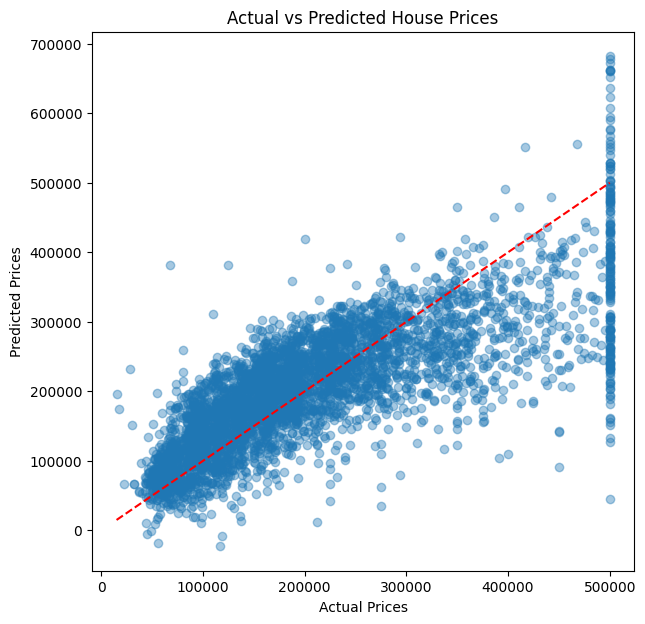

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.show()


The predictions show a clear positive relationship with actual prices, indicating that the model captures general pricing trends. However, the spread around the diagonal line and the plateau near \$500k suggest limited accuracy for higher-priced homes, likely due to the dataset’s capped target values.

### 📈 Model Performance — R² Score
Compute the **R² (coefficient of determination)** to measure how well the model explains the variance in house prices. An R² value closer to **1.0** indicates a stronger linear fit.

In [8]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.3f}")

R² Score: 0.595


The model explains roughly 59.5% of the variance in housing prices on unseen data.
This suggests that while the model captures major trends (e.g., income vs price), there remains significant unexplained variability — motivating further feature engineering, non-linear models, and regularization in future versions.

---

## ✅ Summary — Baseline Model Results

- **Model:** Linear Regression (trained via the **Normal Equation**)
- **Preprocessing:** ColumnTransformer + OneHotEncoder  
- **RMSE:** Average prediction error magnitude (~\$72K typical)  
- **R²:** Proportion of variance explained (~0.6)

### Key Takeaways
- The model captures primary linear relationships (notably income vs. price) but misses nonlinear and interaction effects.  
- Results provide a strong baseline for understanding the dataset and validating the pipeline structure.

### Next Steps — Version 2
This concludes **Version 1 (Baseline Linear Model)** of the project.  
In **Version 2**, the workflow will be extended to include:
- Implement **Gradient Descent** for Linear Regression (custom training loop)  
- Introduce **Feature Engineering** (derived ratios, transformations)  
- Apply **Normalization / Standardization** for stable optimization  
- Experiment with **Polynomial Regression** to capture nonlinear patterns  
- Integrate **Regularization** (Ridge & Lasso) to prevent overfitting  
- Add **Cross-Validation** for robust model evaluation across folds  
- **Save the trained model** for later use or deployment  


These enhancements will improve generalization, handle nonlinear trends, and prepare the pipeline for production-ready use.